In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('placement.csv')

In [2]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
# q1) Replace NaN values with correct value and justify
print("NaN values before replacement:\n", df.isnull().sum())
# For numerical columns: replace with mean
# For categorical columns: replace with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)
print("NaN values after replacement:\n", df.isnull().sum())
print("Justification: Numerical NaNs replaced with mean to maintain average; categorical NaNs replaced with mode to retain most frequent category.")


NaN values before replacement:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64
NaN values after replacement:
 sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64
Justification: Numerical NaNs replaced with mean to maintain average; categorical NaNs replaced with mode to retain most frequent category.


In [4]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [7]:
# 2) How many of them are not placed?
not_placed_count = df[df['status'] == 'Not Placed'].shape[0]
print("Number of students not placed:", {not_placed_count})

Number of students not placed: {67}


In [13]:
# 3) Reason for non placement from dataset
# Checking correlation of 'status' with other factors
reason_df = df[df['status'] == 'Not Placed']
print("Average marks of non placed students:\n", reason_df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean())
print("Possible reason: Low academic percentages could be a major reason for non placement.")


Average marks of non placed students:
 ssc_p       57.544030
hsc_p       58.395522
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
dtype: float64
Possible reason: Low academic percentages could be a major reason for non placement.


In [9]:
# 4) Relation between salary and mba_p
correlation = df['salary'].corr(df['mba_p'])
print("Correlation between salary and mba_p:",  {correlation})
if correlation > 0:
    print("Positive relation: as mba_p increases, salary tends to increase.")
else:
    print("Negative relation: as mba_p increases, salary tends to decrease.")

Correlation between salary and mba_p: {0.1463244900603874}
Positive relation: as mba_p increases, salary tends to increase.


In [12]:
# 5) Which specialization is getting minimum salary?
min_salary_specialisation = df.groupby('specialisation')['salary'].mean().idxmin()
print("Specialisation getting minimum salary: ",{min_salary_specialisation})


Specialisation getting minimum salary:  {'Mkt&HR'}


In [17]:
# 6) How many of them getting above 500000 salary?
above_5lakh = df[df['salary'] > 500000].shape[0]
print( "Number of students getting above 500000 salary:",{above_5lakh})

Number of students getting above 500000 salary: {3}


In [22]:
# 7) ANOVA between etest_p and mba_p
f_stat, p_value = stats.f_oneway(df['etest_p'], df['mba_p'])
print("ANOVA test result between etest_p and mba_p:")
print("\nF-statistic =", {f_stat}, "p-value =", {p_value})
if p_value < 0.05:
    print(" Reject null hypothesis: Significant difference exists.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

ANOVA test result between etest_p and mba_p:

F-statistic = {98.64487057324706} p-value = {4.672547689133573e-21}
 Reject null hypothesis: Significant difference exists.


In [24]:
# 8) Similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary
group1 = df[df['degree_t'] == 'Sci&Tech']['salary']
group2 = df[df['specialisation'] == 'Mkt&HR']['salary']
t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
print("T-test result:")
print("\nT-statistic =", {t_stat}, "p-value =", {p_value})
if p_value < 0.05:
    print("Reject null hypothesis: Significant difference in salary between groups.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

T-test result:

T-statistic = {2.774724236760964} p-value = {0.006218437705806388}
Reject null hypothesis: Significant difference in salary between groups.


In [27]:
# 9) Convert salary to standard normal distribution
df['salary_standard'] = (df['salary'] - df['salary'].mean()) / df['salary'].std()
print("Converted salary to standard normal distribution (mean=0, std=1).")
df

Converted salary to standard normal distribution (mean=0, std=1).


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_standard
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,-2.408457e-01
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,-1.144562e+00
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,-4.990505e-01
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,-7.514748e-16
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,1.760241e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000,1.437485e+00
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000,-1.762945e-01
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000,8.191023e-02
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000,-1.092922e+00


In [29]:
# 10) PDF of salary range from 700000 to 900000
mean_salary = df['salary'].mean()
std_salary = df['salary'].std()
pdf_700k = stats.norm.pdf(700000, mean_salary, std_salary)
pdf_900k = stats.norm.pdf(900000, mean_salary, std_salary)
print("PDF at 700000:", {pdf_700k}, "PDF at 900000:", {pdf_900k})

PDF at 700000: {3.871278621365137e-12} PDF at 900000: {1.5312479857525641e-19}


In [33]:
# 11) Similarity between degree_t(Sci&Tech) with respect to etest_p and mba_p
group_etest = df[df['degree_t'] == 'Sci&Tech']['etest_p']
group_mba = df[df['degree_t'] == 'Sci&Tech']['mba_p']
f_stat, p_value = stats.f_oneway(group_etest, group_mba)
print(f"ANOVA between etest_p and mba_p for Sci&Tech degree_t:\nF-statistic = {f_stat}, p-value = {p_value}")
if p_value < 0.05:
    print(" Reject null hypothesis: Significant difference exists.")
else:
    print(" Fail to reject null hypothesis: No significant difference.")

ANOVA between etest_p and mba_p for Sci&Tech degree_t:
F-statistic = 20.53902604077106, p-value = 1.4289217003775155e-05
 Reject null hypothesis: Significant difference exists.


In [34]:
# 12) Which parameter is highly correlated with salary?
correlations = df.corr()['salary'].sort_values(ascending=False)
print(" Correlation of salary with other parameters:\n", correlations)

 Correlation of salary with other parameters:
 salary_standard    1.000000
salary             1.000000
etest_p            0.152829
mba_p              0.146324
hsc_p              0.054506
sl_no              0.051550
ssc_p              0.023571
degree_p          -0.014148
Name: salary, dtype: float64


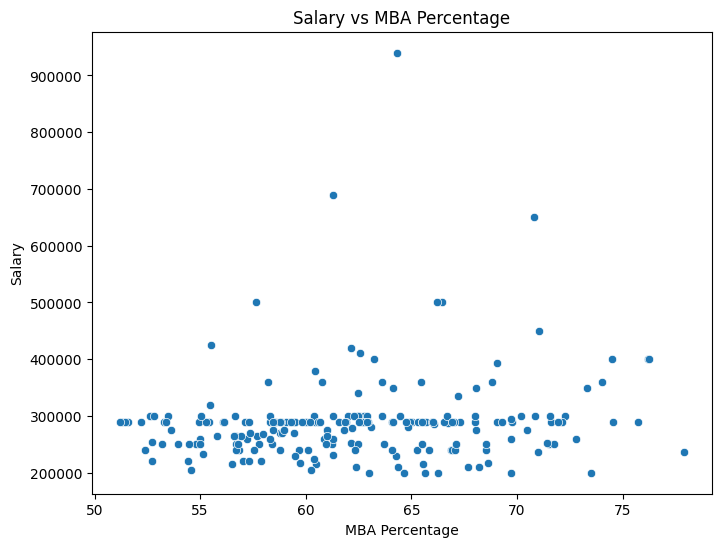

✅ Graph Explanation: Shows how salary varies with MBA percentage; useful to observe linear trend or outliers.


In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='mba_p', y='salary', data=df)
plt.title('Salary vs MBA Percentage')
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.show()
print("✅ Graph Explanation: Shows how salary varies with MBA percentage; useful to observe linear trend or outliers.")
